<center style="font-size: 2em; font-weight: bold;"> Estadistica para Economístas </center>
<center style="font-size: 2em; font-weight: bold;"> Semana 2: medidas de tendencia, dispersión y corrleación </center>


# Librerias

In [1]:
import pandas
import os
import numpy
import seaborn

# Carga de data

In [2]:
ruta = "D:/Dropbox/Docencia/UPN/Estadistica/S2/Data"
os.path.join(ruta,"BD_2.xlsx")

'D:/Dropbox/Docencia/UPN/Estadistica/S2/Data\\BD_2.xlsx'

In [3]:
data = pandas.read_excel(os.path.join(ruta,"BD_2.xlsx"))
data.shape

(28147, 6)

Describiendo la informacion de los primeros 5 observaciones

In [4]:
data.head(5)

,rpersona,rArea,rDpto,reduca_niv,r6,rmujer
0,50070031101,Urbano,Amazonas,Superior universitaria,6433.593750,Hombre
1,50070121101,Urbano,Amazonas,Secundaria,1062.165894,Mujer
2,50070221101,Urbano,Amazonas,Superior universitaria,2224.665283,Hombre
3,50090411101,Urbano,Amazonas,Elemental,397.583344,Mujer
4,50091261101,Urbano,Amazonas,Secundaria,5580.133301,Hombre


Describir que tipo de informacion es cada variable

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28147 entries, 0 to 28146
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rpersona    28147 non-null  int64  
 1   rArea       28147 non-null  object 
 2   rDpto       28147 non-null  object 
 3   reduca_niv  28144 non-null  object 
 4   r6          28147 non-null  float64
 5   rmujer      28147 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


# Medidas de tendencia central

- Para las medidas de tendencia central y mas adeltante las medidas de dispoersión, utilizarmeos las medidas estadisticas como: **promedio**, **mediana**, **dispersión**, entre otros
- El comando que nos permitira realizar ello sera:
    - Promedio y medidana : **mean**, **median**
    - El agrupamiento: **groupby**

## Promedio

Describiendo el ingreso promedio por area

In [6]:
data.groupby(['rArea'])['r6'].mean()

rArea
Rural      828.645288
Urbano    1662.929682
Name: r6, dtype: float64

Describiendo el ingreso promedio por mujer y hombre

In [7]:
data.groupby(['rmujer'])['r6'].mean()

rmujer
Hombre    1462.265161
Mujer     1016.872146
Name: r6, dtype: float64

Describiendo el ingreso promedio por departamento

In [8]:
data.groupby(['rDpto'])['r6'].mean()

rDpto
Amazonas                 1091.770178
Apurímac                 1095.351463
Arequipa                 1701.090343
Ayacucho                 1010.462182
Cajamarca                 981.746473
Cusco                    1030.309517
Huancavelica              725.480686
Huánuco                  1031.258277
Ica                      1714.827594
Junín                    1169.230231
La Libertad              1570.114652
Lambayeque               1436.902418
Lima                     1814.115850
Loreto                   1197.873660
Madre de Dios            1764.753914
Moquegua                 1861.424463
Pasco                    1072.930425
Piura                    1378.480112
Prov Const del Callao    1582.568286
Puno                      720.968657
San Martín               1390.841136
Tacna                    1366.646365
Tumbes                   1376.498040
Ucayali                  1322.244458
Áncash                   1181.682070
Name: r6, dtype: float64

## Mediana

Describiendo la **mediana** del ingreso según area

In [9]:
data.groupby(['rArea'])['r6'].median()

rArea
Rural      565.547546
Urbano    1162.078918
Name: r6, dtype: float64

## Percentile

- Analisis del percentil 10, 25, 50 y 75

In [10]:
numpy.percentile(data['r6'],10)

160.7166687011719

In [11]:
# Print each percentile 
print("percentile 25:", numpy.percentile(data['r6'],25))
print('percentile 50:', numpy.percentile(data['r6'],50))
print('percentile 75:' , numpy.percentile(data['r6'],75))

percentile 25: 402.2916717529297
percentile 50: 890.9166870117188
percentile 75: 1612.3333740234375


## Graficos

- Para los graficos realizaremos la libreria de **seaborn**, que permitira realizar de manera mas rapida los graficos de tendencia central y dispersión analizados
- Los comandos seran:
    - **histplot**
    - **catplot**

### Grafico de Histograma

Histograma de la variable ingreso

<AxesSubplot: xlabel='r6', ylabel='Count'>

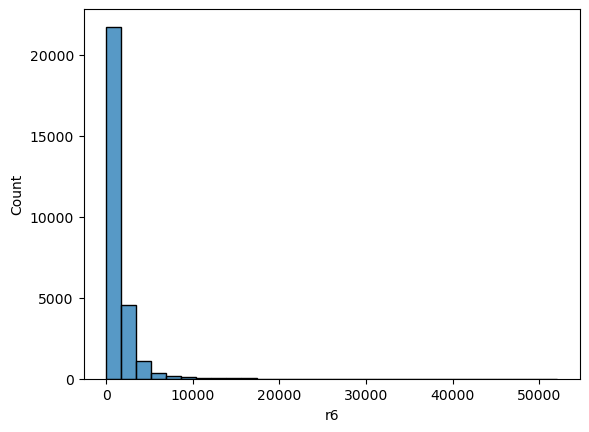

In [12]:
seaborn.histplot(data, x='r6', bins=30)

Histograma de la variable ingresos según el tipo de sexo (mujer vs hombre)

<AxesSubplot: xlabel='r6', ylabel='Count'>

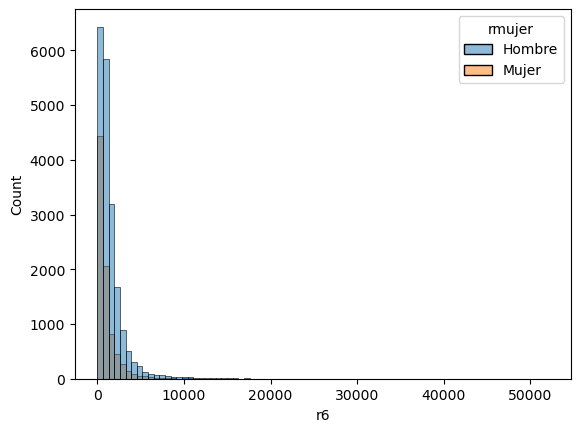

In [13]:
seaborn.histplot(data, x='r6',hue="rmujer", bins=80)

C:\Users\edinson\.conda\envs\python_3_10\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='lnr6', ylabel='Count'>

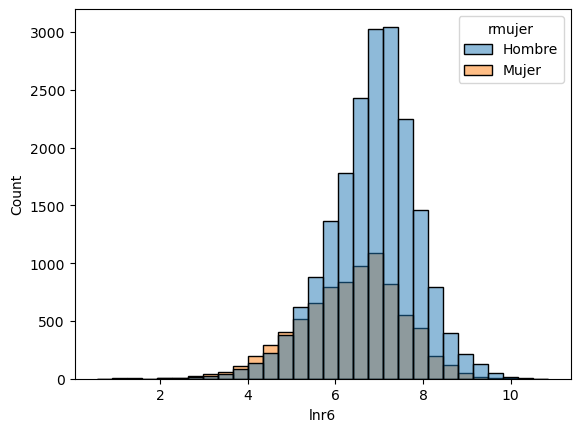

In [14]:
# Logatirmo del Ingreso
data['lnr6'] = numpy.log(data['r6'])
seaborn.histplot(data, x='lnr6',hue="rmujer", bins=30)

### Grafico de Caja

Para poder realizar un grafico de caja, utilizaremos el comando:
- catplot: permite realizar una serie de graficos para variables categoricas

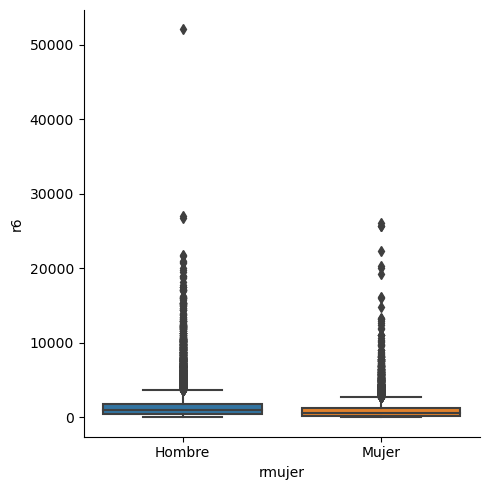

In [15]:
seaborn.catplot(data, x="rmujer",y="r6", kind="box")

- Removemos los outliers , o tambien conocidos como datos atipicos

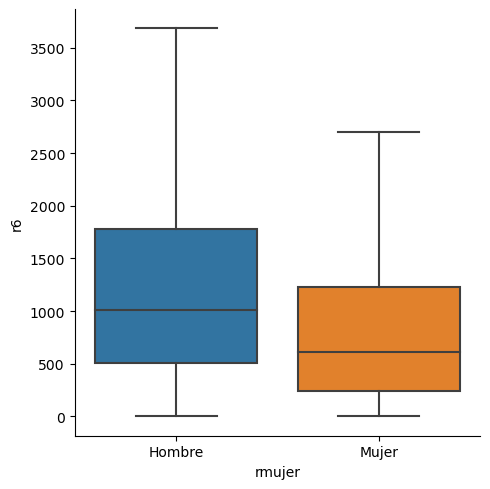

In [16]:
seaborn.catplot(data, x="rmujer",y="r6", kind="box", showfliers=False)

- Realizar el grafico de caja de los ingresos según nivel educativo
- Para ello debemos especificar en el comando saborn que la variable x debe ser numerica y la variable y debe ser la categorica

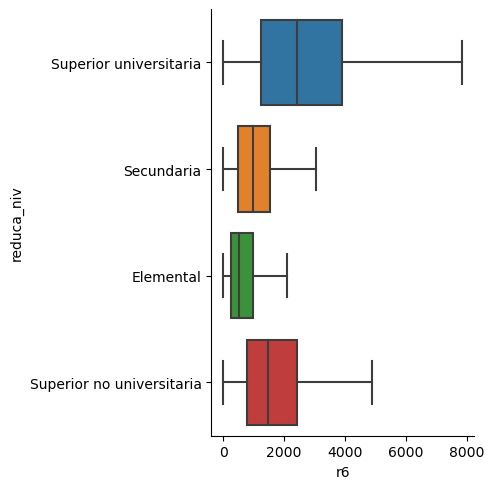

In [17]:
seaborn.catplot(data, orient="h", x="r6",y="reduca_niv", kind="box",  showfliers=False)


# Medidas de Dispersión

Dentro de las medidas de dispersión tenemos los famosos analisis de **varianza** y de **desviación estandar**

## Medida de desviación estandar

In [18]:
data.groupby(['rArea'])['r6'].std()

rArea
Rural     1118.998968
Urbano    1907.644415
Name: r6, dtype: float64

## Medida de Varianza

In [19]:
data.groupby(['rArea'])['r6'].var()

rArea
Rural     1.252159e+06
Urbano    3.639107e+06
Name: r6, dtype: float64

# Analisis de la distribución de la variable

Analizaremos la distribución del ingreso per-capita mensual y sus principales indicadores de tendencia central y dispersion


Indicadores de tendencia central
--------------------------------------
Promedio de los ingresos: 1328.6171911424246
Mediana de los ingresos: 890.9166870117188

Indicadores de dispersión
--------------------------------------
Varianza de los ingresos: 2849689.104931771
Desviacion estandar de los ingresos: 1688.102219929756


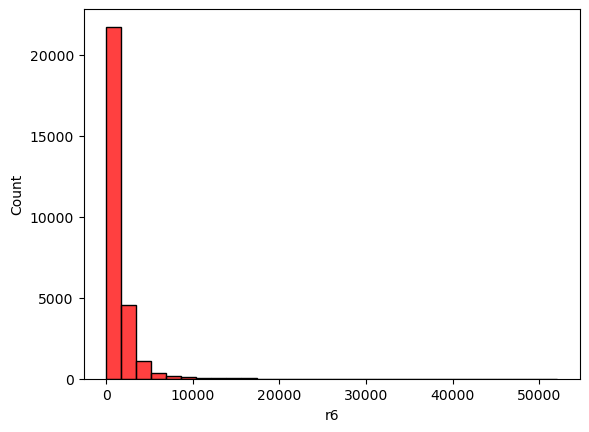

In [25]:
# Informacion de histograma
seaborn.histplot(data, x='r6', bins=30, color='red')
print()
print("Indicadores de tendencia central")
print("--------------------------------------")
print("Promedio de los ingresos:", data['r6'].mean())
print("Mediana de los ingresos:", data['r6'].median())
print()
print("Indicadores de dispersión")
print("--------------------------------------")
print("Varianza de los ingresos:", data['r6'].var())
print("Desviacion estandar de los ingresos:", data['r6'].std())


Analizaremos la distribución del ingreso per-capita mensual y sus principales indicadores de tendencia central y dispersion
- Consodirando solo los ingresos hasta 5000 soles y para hombre sy mujeres


## Data solo para hombres

In [31]:
data_hombres = data[data['rmujer'] == 'Hombre']
data_hombres.head(4)

,rpersona,rArea,rDpto,reduca_niv,r6,rmujer,lnr6
0,50070031101,Urbano,Amazonas,Superior universitaria,6433.593750,Hombre,8.769289
2,50070221101,Urbano,Amazonas,Superior universitaria,2224.665283,Hombre,7.707362
4,50091261101,Urbano,Amazonas,Secundaria,5580.133301,Hombre,8.626968
5,50191141101,Urbano,Amazonas,Elemental,1255.228027,Hombre,7.135073



Indicadores de tendencia central
--------------------------------------
Promedio de los ingresos: 1462.2651607809585
Mediana de los ingresos: 1007.3474731445312

Indicadores de dispersión
--------------------------------------
Varianza de los ingresos: 3138293.4715919634
Desviacion estandar de los ingresos: 1771.5229243766403


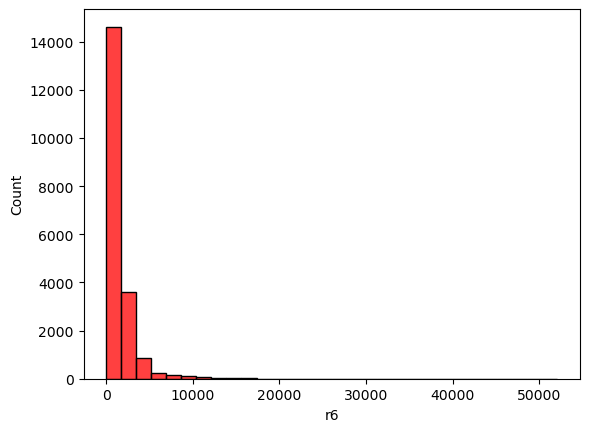

In [32]:
# Informacion de histograma de hombres
seaborn.histplot(data_hombres, x='r6', bins=30, color='red')
print()
print("Indicadores de tendencia central")
print("--------------------------------------")
print("Promedio de los ingresos:", data_hombres['r6'].mean())
print("Mediana de los ingresos:", data_hombres['r6'].median())
print()
print("Indicadores de dispersión")
print("--------------------------------------")
print("Varianza de los ingresos:", data_hombres['r6'].var())
print("Desviacion estandar de los ingresos:", data_hombres['r6'].std())


## Data solo para mujeres

In [33]:
data_mujeres = data[data['rmujer'] == 'Mujer']
data_mujeres.head(4)

,rpersona,rArea,rDpto,reduca_niv,r6,rmujer,lnr6
1,50070121101,Urbano,Amazonas,Secundaria,1062.165894,Mujer,6.968065
3,50090411101,Urbano,Amazonas,Elemental,397.583344,Mujer,5.985405
13,50270651101,Urbano,Amazonas,Elemental,776.569397,Mujer,6.654886
14,50270781101,Urbano,Amazonas,Elemental,388.500000,Mujer,5.962293



Indicadores de tendencia central
--------------------------------------
Promedio de los ingresos: 1016.87214616862
Mediana de los ingresos: 608.5979309082031

Indicadores de dispersión
--------------------------------------
Varianza de los ingresos: 2037921.7230220924
Desviacion estandar de los ingresos: 1427.5579578504307


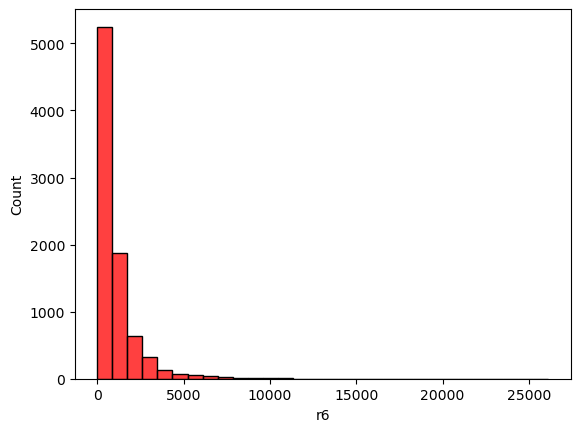

In [34]:
# Informacion de histograma de hombres
seaborn.histplot(data_mujeres, x='r6', bins=30, color='red')
print()
print("Indicadores de tendencia central")
print("--------------------------------------")
print("Promedio de los ingresos:", data_mujeres['r6'].mean())
print("Mediana de los ingresos:", data_mujeres['r6'].median())
print()
print("Indicadores de dispersión")
print("--------------------------------------")
print("Varianza de los ingresos:", data_mujeres['r6'].var())
print("Desviacion estandar de los ingresos:", data_mujeres['r6'].std())
